In [1]:
import pandas as pd

# 1. Data Exploration and Preprocessing


In [2]:
df=pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [4]:
df.describe()

,Unnamed: 0
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [5]:
category_distribution = df['Labels'].value_counts()
print(category_distribution)

alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: Labels, dtype: int64


In [6]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back to string
    text = ' '.join(tokens)
    return text

In [8]:
# Apply the preprocessing function to the 'Data' column
df['processed_Data'] = df['Data'].apply(preprocess_text)

# Display the first few rows of the dataframe after preprocessing
print(df.head())

   Unnamed: 0                                               Data       Labels  \
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism   
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   

                                      processed_Data  
0  xref cantaloupesrvcscmuedu altatheism49960 alt...  
1  xref cantaloupesrvcscmuedu altatheism51060 alt...  
2  newsgroups altatheism path cantaloupesrvcscmue...  
3  xref cantaloupesrvcscmuedu altatheism51120 alt...  
4  xref cantaloupesrvcscmuedu altatheism51121 soc...  


# 2. Naive Bayes Model for Text Classification

In [9]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text
X = tfidf_vectorizer.fit_transform(df['processed_Data'])

# Display the shape of the TF-IDF matrix
print(X.shape)

(19997, 258832)


In [10]:
from sklearn.model_selection import train_test_split

# Define the target variable
# Assuming the category column is named 'category'
y = df['Labels']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15997, 258832) (4000, 258832) (15997,) (4000,)


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=df['Labels'].unique())

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.89775
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.75       173
           comp.graphics       0.87      0.91      0.89       179
 comp.os.ms-windows.misc       0.93      0.88      0.91       226
comp.sys.ibm.pc.hardware       0.85      0.86      0.85       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.97      0.94      0.96       186
            misc.forsale       0.91      0.78      0.84       190
               rec.autos       0.92      0.94      0.93       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.90      0.98      0.94       200
         sci.electronics       0.94      0.90      0.92       227
                 sci.med       1.

# 3. Sentiment Analysis

In [11]:
!pip install nltk
!pip install pandas

In [12]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...


True

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment based on the compound score
def get_sentiment(text):
    sentiment_dict = sid.polarity_scores(text)
    if sentiment_dict['compound'] >= 0.05:
        return 'positive'
    elif sentiment_dict['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment function to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the first few rows with the sentiment labels
print(df.head())

   Unnamed: 0                                               Data       Labels  \
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism   
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   

                                      processed_Data Sentiment  
0  xref cantaloupesrvcscmuedu altatheism49960 alt...  positive  
1  xref cantaloupesrvcscmuedu altatheism51060 alt...  positive  
2  newsgroups altatheism path cantaloupesrvcscmue...  negative  
3  xref cantaloupesrvcscmuedu altatheism51120 alt...  positive  
4  xref cantaloupesrvcscmuedu altatheism51121 soc...  negative  


<Figure size 1400x700 with 0 Axes>

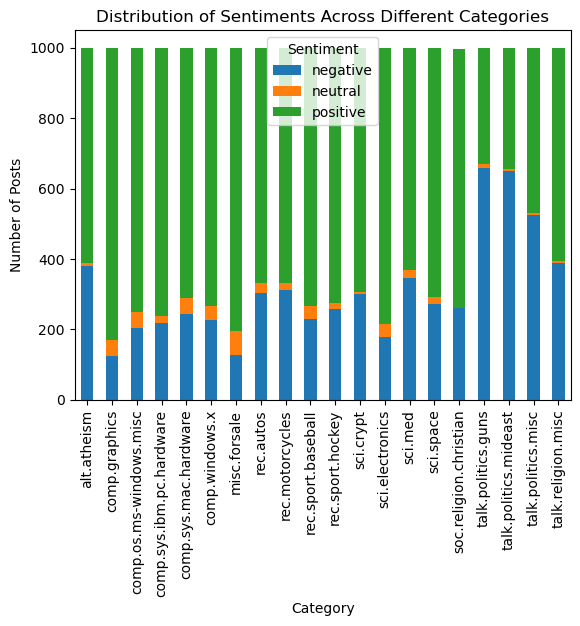

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                  379.0      8.0     613.0
comp.graphics                123.0     47.0     830.0
comp.os.ms-windows.misc      204.0     45.0     751.0
comp.sys.ibm.pc.hardware     218.0     19.0     763.0
comp.sys.mac.hardware        243.0     47.0     710.0
comp.windows.x               226.0     40.0     734.0
misc.forsale                 126.0     70.0     804.0
rec.autos                    304.0     28.0     668.0
rec.motorcycles              311.0     20.0     669.0
rec.sport.baseball           228.0     39.0     733.0
rec.sport.hockey             259.0     16.0     725.0
sci.crypt                    300.0      7.0     693.0
sci.electronics              178.0     36.0     786.0
sci.med                      346.0     22.0     632.0
sci.space                    271.0     21.0     708.0
soc.religion.christian       260.0      0.0     737.0
talk.politics.guns          

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of positive, negative, and neutral sentiments in each category
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Plot the distribution
plt.figure(figsize=(14, 7))
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

# Summarize findings
print(sentiment_distribution)

# Challenges
Imbalanced Data: Some categories have more examples than others, leading to potential classifier bias towards these categories.
Feature Sparsity: The large number of features (words) with infrequent appearances can result in sparse data, affecting the classifier's ability to learn reliable patterns.
Text Preprocessing: Incorrect cleaning and preprocessing can cause loss of important information, negatively impacting model performance.

# Reflection on Sentiment Analysis Results
Content Insights:

Positive Sentiments: Indicate supportive and encouraging content.

Negative Sentiments: Highlight critical or controversial topics.

Neutral Sentiments: Reflect informative or factual content.

Implications:

Content Strategy: Tailor content to boost positive engagement and address negative feedback.

Audience Insights: Improve content relevance and impact by understanding reader reactions and preferences.

Trend Analysis: Adapt content to reflect current reader interests and sentiment trends, ensuring continued engagement.